In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('full_limpo.csv')
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

id                                                url  \
0  2518714218  https://www.vivareal.com.br/imovel/apartamento...   
1  2514507001  https://www.vivareal.com.br/imovel/apartamento...   
2  2517994582  https://www.vivareal.com.br/imovel/apartamento...   
3  2514968475  https://www.vivareal.com.br/imovel/apartamento...   
4  2509002086  https://www.vivareal.com.br/imovel/apartamento...   

                                          header  \
0  Apartamento com 3 Quartos para Aluguel, 110m²   
1   Apartamento com 2 Quartos para Aluguel, 93m²   
2      Apartamento com Quarto para Aluguel, 36m²   
3   Apartamento com 2 Quartos para Aluguel, 80m²   
4  Apartamento com 3 Quartos para Aluguel, 140m²   

                                             address  area  rooms  bathrooms  \
0       Rua Bagé, 230 - Vila Mariana, São Paulo - SP   110      3          2   
1    Alameda Campinas, 701 - Jardins, São Paulo - SP    93      2          3   
2      Rua Itararé - Cerqueira César, São Paulo - SP    36      1          1   
3  Rua Fidélis Papini, 786 - Vila Prudente, São P...    80      2          2   
4          Rua Guarará, 77 - Jardins, São Paulo - SP   140      3          3   

  garages                                          amenities   price   condo  \
0       1  Piscina\nAcademia\nElevador\nCondomínio fechad...  4400.0  1100.0   
1       2  Mobiliado\nPiscina\nAcademia\nChurrasqueira\nA...  8000.0  1300.0   
2       1  Mobiliado\nPiscina\nVaranda gourmet\nChurrasqu...  1700.0   598.0   
3       1  Academia\nChurrasqueira\nJardim\nSalão de fest...  1900.0   798.0   
4       2  Ar-condicionado\nElevador\nCondomínio fechado\...  6000.0  1600.0   

     crawler        crawled_at      neighborhood  
0  São Paulo  2021-05-11 17:55      Vila Mariana  
1  São Paulo  2021-05-11 17:55           Jardins  
2  São Paulo  2021-05-11 17:55   Cerqueira César  
3  São Paulo  2021-05-11 17:55     Vila Prudente  
4  São Paulo  2021-05-11 17:55           Jardins

In [3]:
df.columns

Index(['id', 'url', 'header', 'address', 'area', 'rooms', 'bathrooms',
       'garages', 'amenities', 'price', 'condo', 'crawler', 'crawled_at',
       'neighborhood'],
      dtype='object')

In [4]:
df.shape

(6392, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6392 non-null   int64  
 1   url           6392 non-null   object 
 2   header        6392 non-null   object 
 3   address       6392 non-null   object 
 4   area          6392 non-null   int64  
 5   rooms         6392 non-null   int64  
 6   bathrooms     6392 non-null   int64  
 7   garages       6392 non-null   object 
 8   amenities     5779 non-null   object 
 9   price         6389 non-null   float64
 10  condo         6117 non-null   float64
 11  crawler       6392 non-null   object 
 12  crawled_at    6392 non-null   object 
 13  neighborhood  6392 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 699.2+ KB


### Imputando valores

In [6]:
df.shape

(6392, 14)

In [7]:
df.isnull().sum()

id                0
url               0
header            0
address           0
area              0
rooms             0
bathrooms         0
garages           0
amenities       613
price             3
condo           275
crawler           0
crawled_at        0
neighborhood      0
dtype: int64

In [8]:
a = df.price.median()

In [9]:
df['price'] = df['price'].fillna(a)
df['condo'] = df['condo'].fillna(2.0)
df = df.dropna()

In [10]:
df.shape

(5779, 14)

In [11]:
df.isnull().sum()

id              0
url             0
header          0
address         0
area            0
rooms           0
bathrooms       0
garages         0
amenities       0
price           0
condo           0
crawler         0
crawled_at      0
neighborhood    0
dtype: int64

In [12]:
df.index = df['id']
df = df.drop(['id'],axis=1)
df.head()

url  \
id                                                              
2518714218  https://www.vivareal.com.br/imovel/apartamento...   
2514507001  https://www.vivareal.com.br/imovel/apartamento...   
2517994582  https://www.vivareal.com.br/imovel/apartamento...   
2514968475  https://www.vivareal.com.br/imovel/apartamento...   
2509002086  https://www.vivareal.com.br/imovel/apartamento...   

                                                   header  \
id                                                          
2518714218  Apartamento com 3 Quartos para Aluguel, 110m²   
2514507001   Apartamento com 2 Quartos para Aluguel, 93m²   
2517994582      Apartamento com Quarto para Aluguel, 36m²   
2514968475   Apartamento com 2 Quartos para Aluguel, 80m²   
2509002086  Apartamento com 3 Quartos para Aluguel, 140m²   

                                                      address  area  rooms  \
id                                                                           
2518714218       Rua Bagé, 230 - Vila Mariana, São Paulo - SP   110      3   
2514507001    Alameda Campinas, 701 - Jardins, São Paulo - SP    93      2   
2517994582      Rua Itararé - Cerqueira César, São Paulo - SP    36      1   
2514968475  Rua Fidélis Papini, 786 - Vila Prudente, São P...    80      2   
2509002086          Rua Guarará, 77 - Jardins, São Paulo - SP   140      3   

            bathrooms garages  \
id                              
2518714218          2       1   
2514507001          3       2   
2517994582          1       1   
2514968475          2       1   
2509002086          3       2   

                                                    amenities   price   condo  \
id                                                                              
2518714218  Piscina\nAcademia\nElevador\nCondomínio fechad...  4400.0  1100.0   
2514507001  Mobiliado\nPiscina\nAcademia\nChurrasqueira\nA...  8000.0  1300.0   
2517994582  Mobiliado\nPiscina\nVaranda gourmet\nChurrasqu...  1700.0   598.0   
2514968475  Academia\nChurrasqueira\nJardim\nSalão de fest...  1900.0   798.0   
2509002086  Ar-condicionado\nElevador\nCondomínio fechado\...  6000.0  1600.0   

              crawler        crawled_at      neighborhood  
id                                                         
2518714218  São Paulo  2021-05-11 17:55      Vila Mariana  
2514507001  São Paulo  2021-05-11 17:55           Jardins  
2517994582  São Paulo  2021-05-11 17:55   Cerqueira César  
2514968475  São Paulo  2021-05-11 17:55     Vila Prudente  
2509002086  São Paulo  2021-05-11 17:55           Jardins

<AxesSubplot:>

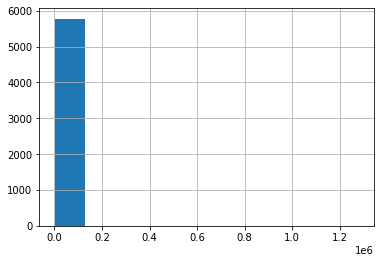

In [13]:
df.price.hist()

/home/sara/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


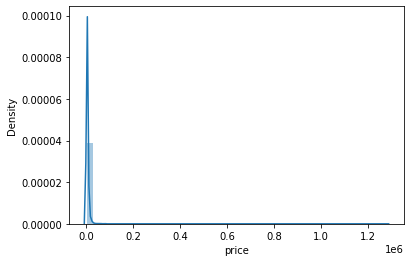

In [14]:
import seaborn as sns
sns.distplot(df['price']);

In [15]:
df = df[df.price <= 25000]

Text(0, 0.5, 'Aluguel')

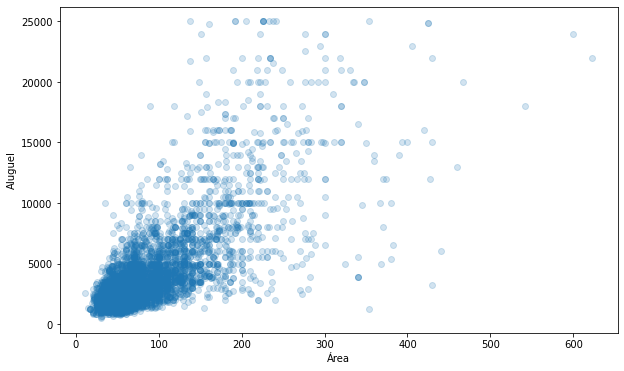

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['price'], alpha=0.2)
#x = [0, 400, 1000]
#y = [0, 10000, 20000]
#plt.plot(x, y, c='r')
plt.xlabel('Área')
plt.ylabel('Aluguel')

In [17]:
df2 = df.sample(500)

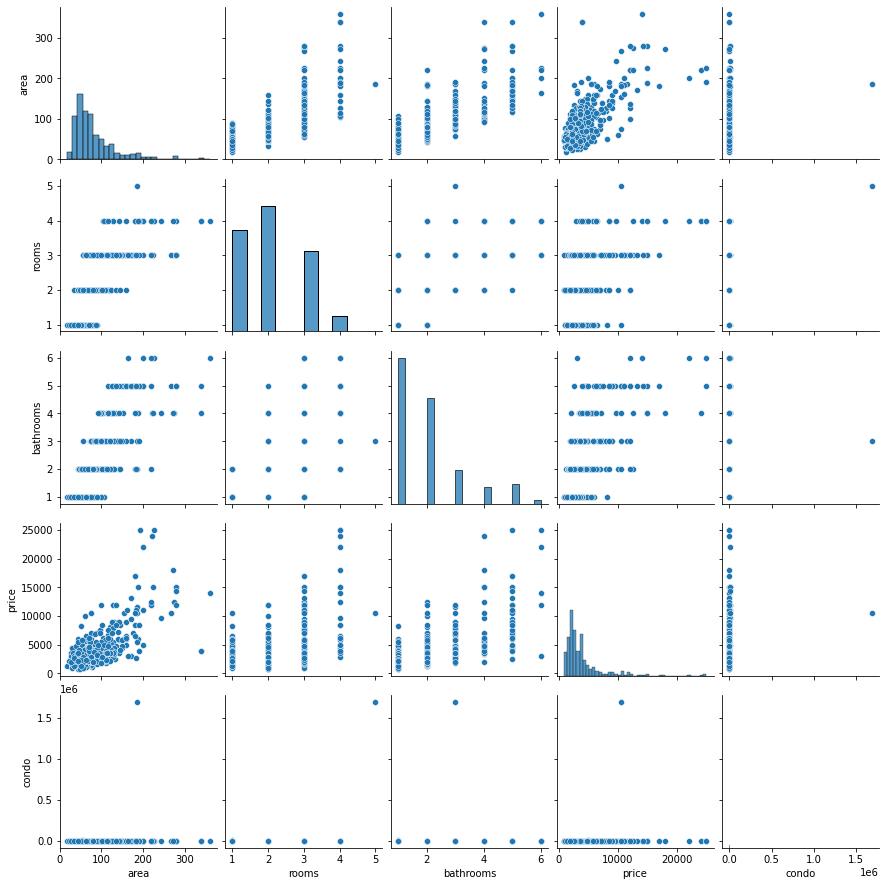

In [18]:
sns.pairplot(df2)

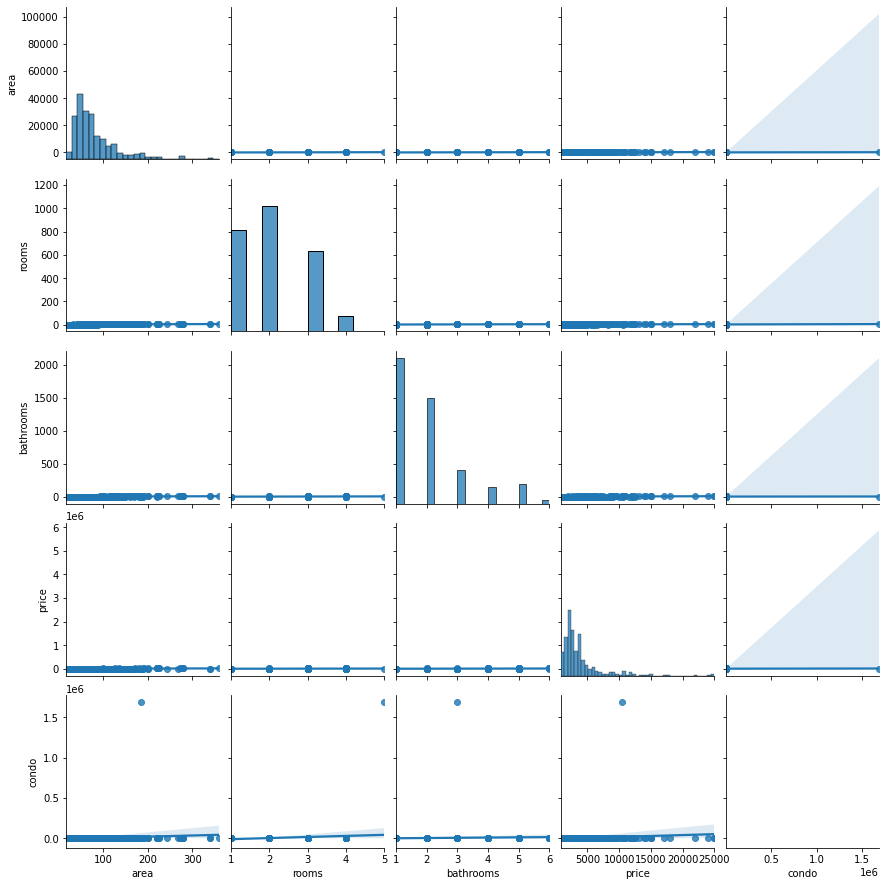

In [19]:
sns.pairplot(df2, kind='reg')

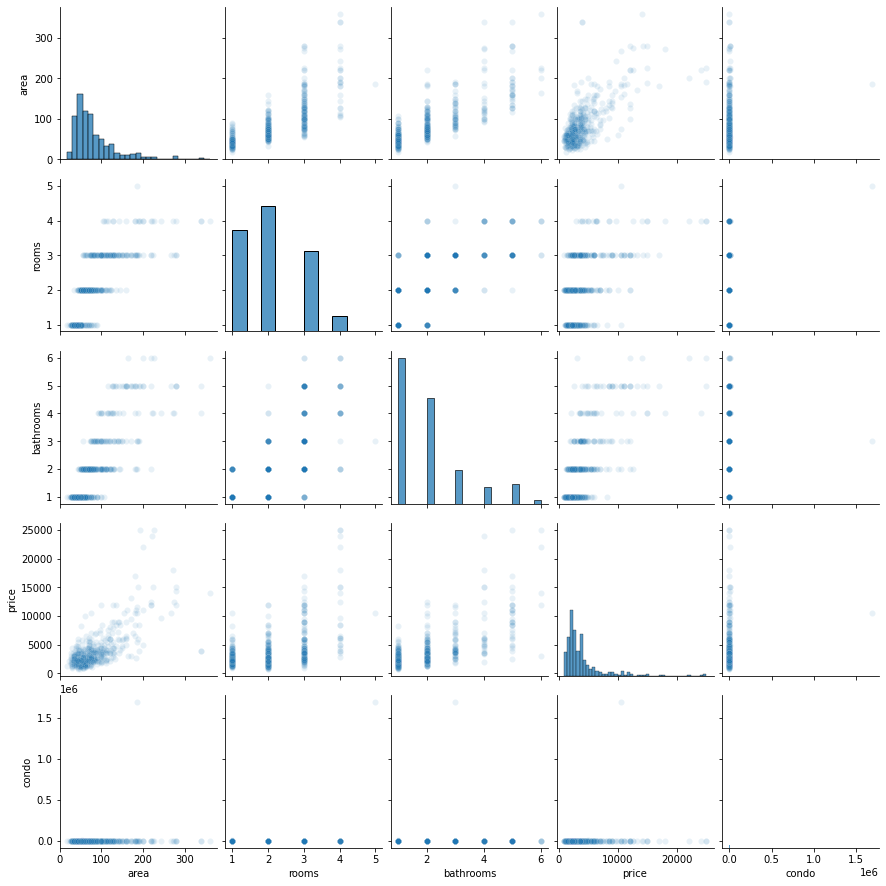

In [20]:
g = sns.pairplot(df2, plot_kws={'alpha':0.1})

In [21]:
df.corr()

area     rooms  bathrooms     price     condo
area       1.000000  0.734094   0.778668  0.730869  0.054356
rooms      0.734094  1.000000   0.713144  0.441602  0.058409
bathrooms  0.778668  0.713144   1.000000  0.629549  0.024605
price      0.730869  0.441602   0.629549  1.000000  0.031687
condo      0.054356  0.058409   0.024605  0.031687  1.000000

<AxesSubplot:>

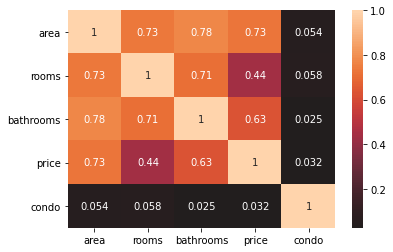

In [22]:
sns.heatmap(df.corr(), annot=True, center=0)

<AxesSubplot:>

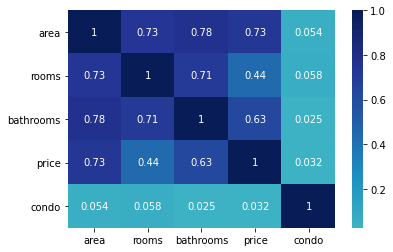

In [23]:
sns.heatmap(df.corr(), annot=True, center=0, cmap="YlGnBu")

<AxesSubplot:>

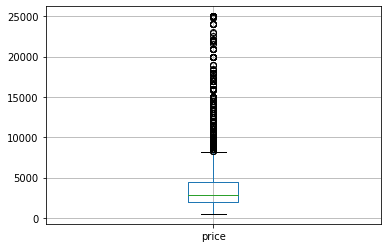

In [24]:
df.boxplot('price')

<AxesSubplot:xlabel='neighborhood', ylabel='price'>

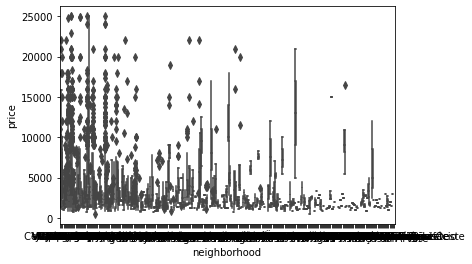

In [25]:
sns.boxplot(x='neighborhood', y='price', data=df)

In [26]:
centro = ['Centro','Bela Vista','Bom Retiro','Cambuci','Consolação','Vila Monumento','Luz',
          'Higienópolis','Liberdade','República','Santa Cecília','Sé','Paraíso','Santa Efigênia',
         'Aclimação','Campos Eliseos','Campos Elíseos','Cerqueira César','Planalto Paulista',
         'Vila Monte Alegre','Vila Buarque','Jardim da Glória','Vila Moinho Velho']

norte = ['Norte','Anhanguera','Brasilândia','Casa Verde','Cachoeirinha','Freguesia do Ó','Jaçanã','Jaraguá',
    'Limão','Mandaqui','Perus','Pirituba','Santana','São Domingos','Tremembé','Tucuruvi','Vila Maria','Vila Iório',
    'Vila Medeiros','Vila Guilherme','Jardim Peri Peri','Vila Constança','City América','Jardim Yara',
        'Vila Paulistana','Sitio Botuquara','Jardim Shangrila','Jardim Franca','Vila Isolina Mazzei','Chora Menino',
        'Vila Zat','Água Fria','Jardim Japão','Vila Mangalot','Vila Carbone','Sítio Botuquara','Horto Florestal',
        'Vila Nova Mazzei','Imirim','Jardim São Paulo','Vila Libanesa','Vila Americana','Parque São Luís',
        'Lauzane Paulista','Vila Palmeiras','Vila Ede','Vila Prado']

sul = ['Sul','Chácara Klabin','Campo Belo','Campo Limpo','Capão Redondo','Cidade Ademar','Cidade Dutra','Cursino','Grajaú',
    'Itaim Bibi','Ipiranga','Jabaquara' ,'Jardim Ângela' ,'Jardim São Luís','Marsilac', 'Moema',
    'Moema Pássaros','Moema Índios','Morumbi','Parelheiros','Pedreira','Sacomã','Jardim Avenida',
    'Santo Amaro','Socorro','Saúde','Vila Andrade','Vila Mariana','Vila Olímpia','Vila Mascote','Brooklin',
       'Vila Gumercindo','Vila Cruzeiro','Vila Gertrudes','Vila Arriete','Parque Colonial','Vila Clementino',
       'Vila Sofia','Vila Uberabinha','Jardim Dom Bosco','Jardim Aeroporto','Vila Congonhas','Indianópolis',
       'Brooklin Novo','Brooklin Paulista','Cidade das Monções','Cidade Monções','Jardins','Vila Nova Conceição',
      'Chácara Inglesa','Vila Santa Maria','Balneário Mar Paulista','Ferreira','Jardim Prudência','Chácara Flora',
      'Vila Tramontano','Jardim Hípico','Chácara Nossa Senhora do Bom Conselho','Cidade Domitila','Vila Castelo',
       'Chácara Santo Antônio','Jardim das Acacias','Vila Santo Estéfano','Alto Da Boa Vista','Parque Lagoa Rica',
      'Jardim Petrópolis','Guarapiranga','Jardim Cordeiro','Jardim dos Estados','Chácara Santa Maria',
      'Jardim das Acácias','Jardim Aurélia','Jardim Ampliação','Jardim Satélite','Interlagos','Jardim da Saude',
      'Jardim Represa','Jardim Vitória Régia','Jardim Sandra','Real Parque','Vila Dom Pedro I','Vila Guarani',
       'Chácara Vista Alegre','Vila Cordeiro','Jardim Santo Antoninho','Vila Santa Catarina','Nova Piraju',
      'Jordanópolis','Jardim Iracema','Vila Anhangüera','Vila Nair','Jardim Leonor','Chácara Bosque do Sol',
      'Vila Império','Vila Imperio','Jardim dos Lagos','Jardim Vilas Boas','Jardim Panorama','Chácara Monte Alegre',
       'Jardim Caboré','Jardim Taquaral','Praia da Lagoa','Jardim Marajoara','Paulicéia','Varginha',
       'Cidade Jardim','Jardim Francisco Mendes','Jardim Santa Tereza','Alto da Boa Vista','Parque Maria Fernandes']

leste = ['Leste','Água Rasa','Aricanduva','Artur Alvim','Belém','Brás','Cangaíba','Carrão','Cidade Líder',
    'Cidade Tiradentes','Ermelino Matarazzo','Guaianases','Itaim Paulista','Itaquera','Vila Invernada',
    'Jardim Helena','José Bonifácio','Lajeado','Mooca','Pari','Parque do Carmo','Penha','Vila Primavera',
    'Ponte Rasa','São Lucas','São Mateus','São Miguel','São Rafael','Sapopemba','Tatuapé','São João Clímaco',
         'Quarta Parada','Jardim Tietê','Vila Antonieta','Cidade Mãe do Céu','Vila Regente Feijó','Vila Antonina',
         'Chácara Belenzinho','Belenzinho','Jardim Egle','Cidade Vargas','Cidade Satélite Santa Bárbara',
    'Vila Curuçá','Vila Formosa','Vila Jacuí','Vila Matilde','Vila Prudente','Mooca','Tatuapé','Carandiru',
         'Mirandópolis','Vila Brasilina','Móoca','Jardim Anália Franco','Parque São Jorge','Sítio Pinheirinho',
        'Vila Pierina','Vila São Silvestre','Vila Ema','Parque Novo Mundo','Jardim Paraguaçu','Vila Santo Estevão',
        'Conjunto Habitacional Barreira Grande','Vila Santa Clara','Parque Savoy City','Jardim Avelino',
        'Vila Azevedo','Vila Dalila','Vila Bertioga','Jardim Popular']


oeste = ['Oeste','Alto de Pinheiros','Barra Funda','Butantã','Jaguará','Jardim Paulista','Jardim Paulistano',
    'Jardim Europa','Jardim América','Lapa','Morumbi','Perdizes','Pinheiros','Raposo Tavares','Rio Pequeno'
    'Vila Leopoldina','Vila Madalena','Vila Sônia','Sumarezinho','Sumaré','Boaçava','Jardim das Vertentes',
        'Rio Pequeno','Vila Leopoldina','Panamby','Jardim Monte Kemel','Pompeia','Vila Pompéia',
         'Vila Anglo Brasileira','Vila Romana','Pacaembu','Água Branca','Jardim Guedala','Jardim Everest',
        'Vila Gomes','Jardim das Bandeiras','Jardim Umuarama','Jardim Esmeralda','Jaguaré','Jardim Bonfiglioli',
        'Vila Inah','Jardim Rizzo','Vila Suzana','Parque Ipê','Vila Indiana','Cidade São Francisco',
         'Granja Julieta','Bela Aliança','Caxingui','Vila Tiradentes','Lar São Paulo',
        'Vila Progredior','Vila São Francisco','Vila Prel','Jardim Celeste']

nenhuma = ['nenhuma']

In [27]:
def checar_zona(df,lista):
    df = df[df.address.str.contains('|'.join(lista))] # | em regex try to match each of the substrings in the words in your Serie
    df['zona'] = str(lista[0]) #posição zero de todas as listas é o nome dela mesma
    return df

In [28]:
df1 = checar_zona(df,oeste)
df1.shape

/home/sara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(1331, 14)

In [29]:
df2 = checar_zona(df,sul)
df3 = checar_zona(df,leste)
df4 = checar_zona(df,centro)
df5 = checar_zona(df,norte)

/home/sara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
bairros = nenhuma + sul + oeste + norte + sul + centro + leste
def checarN_zona(df,lista):
    df = df[~df.address.str.contains('|'.join(bairros))]
    df['zona'] = str(lista[0])
    return df
df7 = checarN_zona(df,bairros)
df7.shape

/home/sara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(261, 14)

In [32]:
df_concat = pd.concat([df1,df2,df3,df4,df5,df7])
df_concat.shape

(6101, 14)

In [33]:
df_final = df_concat.drop_duplicates(subset=['address','price'], keep='last', inplace=False)

In [34]:
df_final.shape

(5336, 14)

In [35]:
df_final.tail()

url  \
id                                                              
2496903147  https://www.vivareal.com.br/imovel/apartamento...   
2509006895  https://www.vivareal.com.br/imovel/apartamento...   
2507101098  https://www.vivareal.com.br/imovel/apartamento...   
2512886698  https://www.vivareal.com.br/imovel/apartamento...   
2514567109  https://www.vivareal.com.br/imovel/apartamento...   

                                                   header  \
id                                                          
2496903147  Apartamento com 4 Quartos para Aluguel, 194m²   
2509006895   Apartamento com 2 Quartos para Aluguel, 70m²   
2507101098   Apartamento com 2 Quartos para Aluguel, 50m²   
2512886698   Apartamento com 2 Quartos para Aluguel, 60m²   
2514567109   Apartamento com 2 Quartos para Aluguel, 64m²   

                                               address  area  rooms  \
id                                                                    
2496903147    Rua Tumiaru - Ibirapuera, São Paulo - SP   194      4   
2509006895  Rua Ourânia - Vila Beatriz, São Paulo - SP    70      2   
2507101098             Santa Teresinha, São Paulo - SP    50      2   
2512886698              Parada Inglesa, São Paulo - SP    60      2   
2514567109          Chácara Califórnia, São Paulo - SP    64      2   

            bathrooms garages  \
id                              
2496903147          3       3   
2509006895          2       2   
2507101098          2       1   
2512886698          1       2   
2514567109          1       1   

                                                    amenities   price   condo  \
id                                                                              
2496903147  Piscina\nAcademia\nÁrea de serviço\nJardim\nSa...  8500.0  3200.0   
2509006895  Piscina\nAcademia\nElevador\nEspaço gourmet\nÁ...  5000.0  1500.0   
2507101098  Piscina\nAcademia\nChurrasqueira\nGaragem\nEle...  2200.0   632.0   
2512886698  Piscina\nVaranda\nChurrasqueira\nElevador\nPla...  1900.0   730.0   
2514567109  Mobiliado\nVaranda\nAcademia\nElevador\nÁrea d...  2012.0   488.0   

              crawler        crawled_at   neighborhood     zona  
id                                                               
2496903147  São Paulo  2021-05-11 18:44     Ibirapuera  nenhuma  
2509006895  São Paulo  2021-05-11 18:44   Vila Beatriz  nenhuma  
2507101098  São Paulo  2021-05-11 18:44             SP  nenhuma  
2512886698  São Paulo  2021-05-11 18:44             SP  nenhuma  
2514567109  São Paulo  2021-05-11 18:45             SP  nenhuma

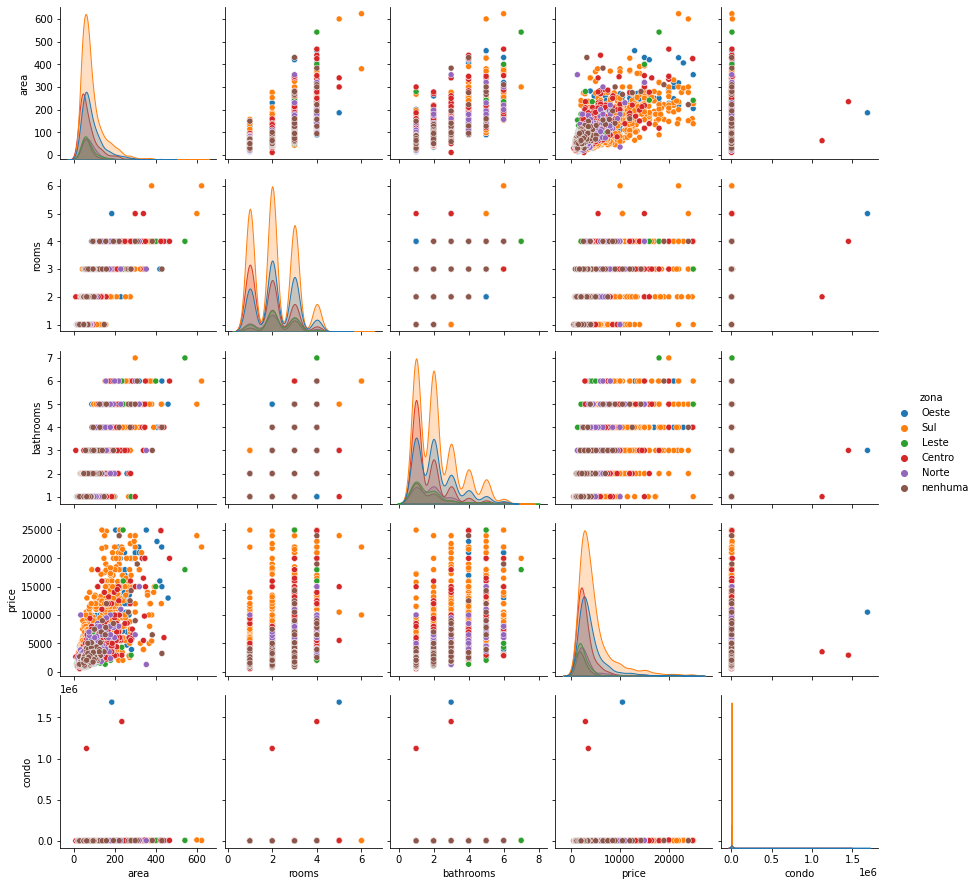

In [36]:
sns.pairplot(df_final,hue='zona')

<AxesSubplot:xlabel='zona', ylabel='price'>

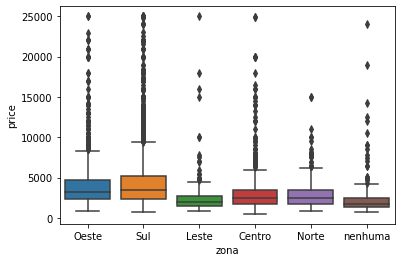

In [37]:
sns.boxplot(x='zona', y='price', data=df_final)

In [38]:
df_final.describe()

area        rooms    bathrooms         price         condo
count  5336.000000  5336.000000  5336.000000   5336.000000  5.336000e+03
mean     85.720577     2.095015     2.015742   3944.378561  1.821927e+03
std      57.243694     0.890734     1.183349   3398.017390  3.408459e+04
min      11.000000     1.000000     1.000000    500.000000  1.000000e+00
25%      50.000000     1.000000     1.000000   2000.000000  5.600000e+02
50%      70.000000     2.000000     2.000000   2900.000000  8.000000e+02
75%     100.000000     3.000000     3.000000   4490.000000  1.200000e+03
max     623.000000     6.000000     7.000000  25000.000000  1.686000e+06

In [39]:
df_final = df_final[df_final.zona != 'nenhuma']
df_final.shape

(5084, 14)

/home/sara/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


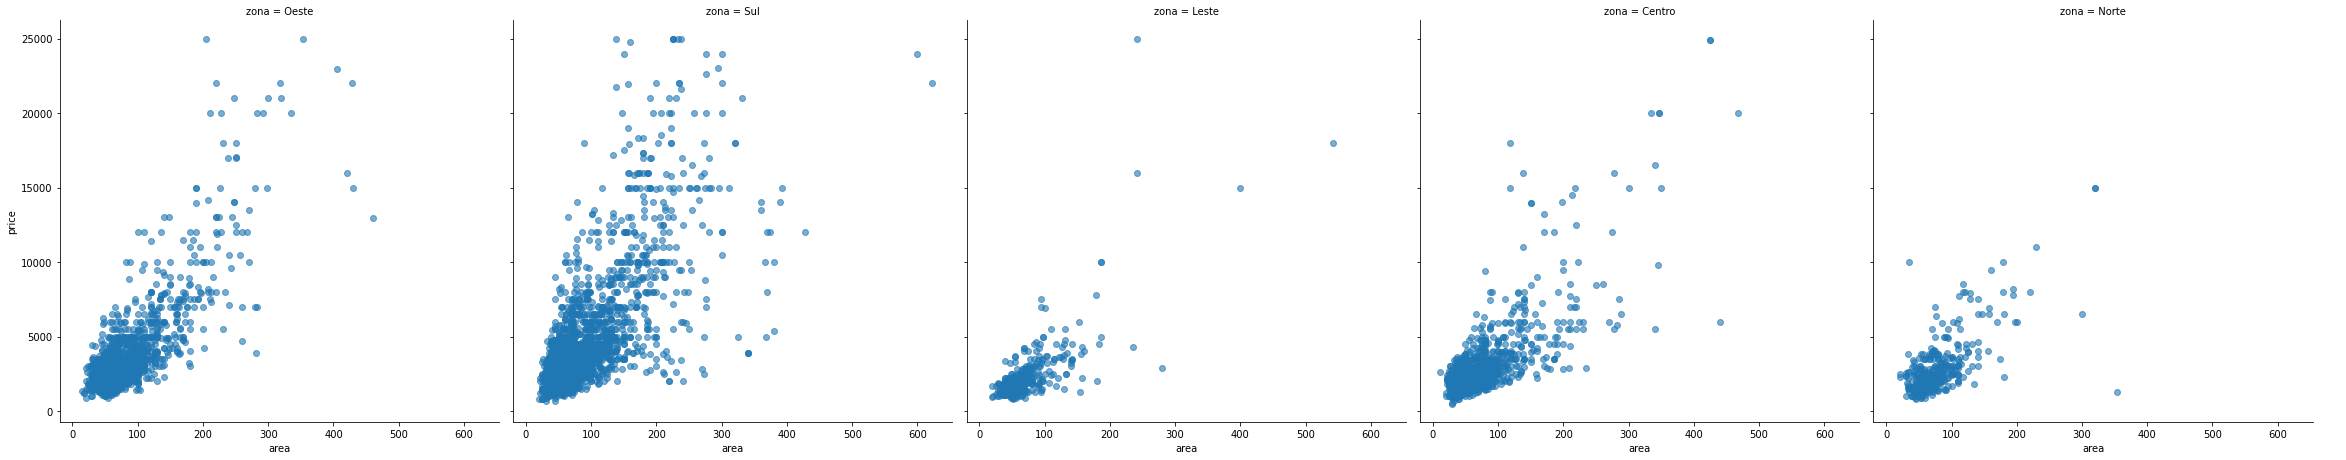

In [42]:
ax = sns.FacetGrid(df_final, col="zona", size=6.5)
ax.map(plt.scatter, "area", "price", alpha=.6)
ax.add_legend()

In [43]:
import plotly.graph_objs as go
from plotly.offline import iplot
# creating trace1
trace1 =go.Scatter(
                    x = df1.area,
                    y = df1.price,
                    mode = "markers",
                    name = "Oeste",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df1.zona)

# creating trace2
trace2 =go.Scatter(
                    x = df2.area,
                    y = df2.price,
                    mode = "markers",
                    name = "Sul",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2.zona)

# creating trace3
trace3 =go.Scatter(
                    x = df3.area,
                    y = df3.price,
                    mode = "markers",
                    name = "Leste",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df3.zona)

trace4 =go.Scatter(
                    x = df4.area,
                    y = df4.price,
                    mode = "markers",
                    name = "Centro",
                    marker = dict(color = 'rgba(0, 125, 100, 0.8)'),
                    text= df4.zona)

trace5 =go.Scatter(
                    x = df5.area,
                    y = df5.price,
                    mode = "markers",
                    name = "Norte",
                    marker = dict(color = 'rgba(0,0,255,0.7)'),
                    text= df5.zona)

data = [trace1, trace2, trace3, trace4, trace5]
layout = dict(title = 'Área e Preço do Aluguel em SP',
              xaxis= dict(title= 'Área'),
              yaxis= dict(title= 'Preço')
             )
fig = dict(data = data, layout = layout)
iplot(fig)

### Material Extra

https://paulovasconcellos.com.br/como-criar-gr%C3%A1ficos-interativos-utilizando-plotly-e-python-3eb6eda57a2b

https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners

